In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Users/L.point/Downloads/IRIS.csv")
df.head()



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Feature Label Split
x = df.drop('species',axis=1)
y = df['species']

In [6]:
# Scaling
from sklearn.preprocessing import StandardScaler, LabelBinarizer
scaled_x = StandardScaler().fit_transform(x)
encoded_y = LabelBinarizer().fit_transform(y)


In [7]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, encoded_y, test_size=0.2,random_state=42)

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(4,)),
    Dense(64, activation='sigmoid'),
    Dense(32, activation='sigmoid'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=8, verbose=1)
     

Epoch 1/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3417 - loss: 1.1141 - val_accuracy: 0.2667 - val_loss: 1.0932
Epoch 2/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3000 - loss: 1.0953 - val_accuracy: 0.5333 - val_loss: 1.0828
Epoch 3/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3333 - loss: 1.0857 - val_accuracy: 0.4667 - val_loss: 1.0722
Epoch 4/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7250 - loss: 1.0666 - val_accuracy: 0.4333 - val_loss: 1.0558
Epoch 5/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6500 - loss: 1.0491 - val_accuracy: 0.6333 - val_loss: 1.0322
Epoch 6/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6167 - loss: 1.0245 - val_accuracy: 0.7667 - val_loss: 0.9993
Epoch 7/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8250 - loss: 0.9804 - val_accuracy: 0.7333 - val_loss: 0.9436
Epoch 8/200
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7167 - loss: 0.9280 - val_accuracy: 0.8333 - 

In [22]:
model.save('ann_iris_classifier.h5')

In [23]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
test_loss, test_accuracy = model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9833 - loss: 0.0506
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0213


In [24]:
train_accuracy, test_accuracy

(0.9833333492279053, 1.0)

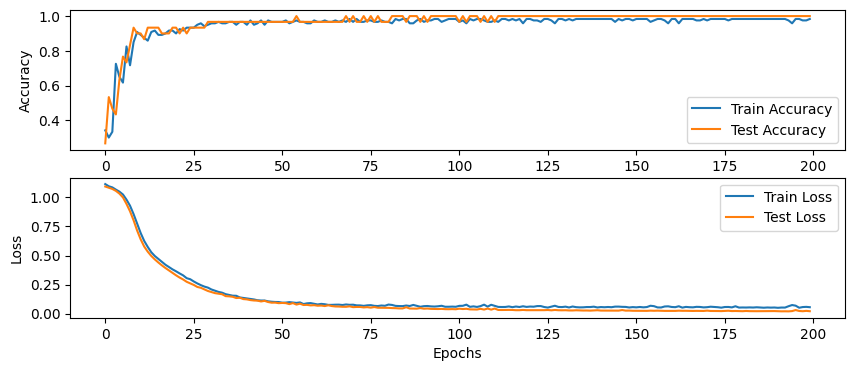

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()